INFO       No numerical integration method specified for group 'synapses_1', using method 'exact' (took 0.00s). [brian2.stateupdaters.base.method_choice]


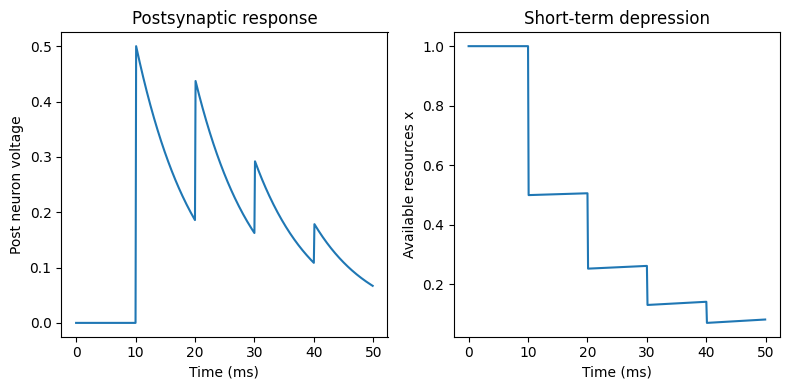

In [2]:
from brian2 import *
import matplotlib.pyplot as plt

start_scope()

# -----------------------
# Neuron model
# -----------------------
eqs = '''
dv/dt = -v / (10*ms) : 1
'''

pre = NeuronGroup(1, eqs, threshold='v>1', reset='v=0', method='exact')
post = NeuronGroup(1, eqs, threshold='v>1', reset='v=0', method='exact')

pre.v = 0
post.v = 0

# Force presynaptic spikes
pre_run = SpikeGeneratorGroup(1, indices=[0,0,0,0], times=[10, 20, 30, 40]*ms)

# -----------------------
# Short-Term Plasticity Synapse
# -----------------------
tau_rec = 800*ms   # MUST be non-zero and have units
U = 0.5

syn_eqs = '''
dx/dt = (1 - x) / tau_rec : 1 (clock-driven)
'''

on_pre = '''
v_post += U * x
x -= U * x
'''

S = Synapses(pre_run, post, model=syn_eqs, on_pre=on_pre)
S.connect()
S.x = 1.0

# -----------------------
# Monitors
# -----------------------
Mv = StateMonitor(post, 'v', record=True)
Mx = StateMonitor(S, 'x', record=True)

# -----------------------
# Run
# -----------------------
run(50*ms)

# -----------------------
# Plot
# -----------------------
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.plot(Mv.t/ms, Mv.v[0])
plt.xlabel("Time (ms)")
plt.ylabel("Post neuron voltage")
plt.title("Postsynaptic response")

plt.subplot(1,2,2)
plt.plot(Mx.t/ms, Mx.x[0])
plt.xlabel("Time (ms)")
plt.ylabel("Available resources x")
plt.title("Short-term depression")

plt.tight_layout()
plt.show()
